# Assignment 3

Hacktiv8 13th session Mission : Lakukan data cleansing dan preprocessing ke Bank Marketing dataset

**Projects Rubric** :
1. Logistic Regression
2. K-Nearest Neighbors
3. Support Vector Machine
4. Decision Tree
5. Random Forest
6. Naive Bayes
7. Confusion Matrix
8. Visualization, 2 plot

In [40]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# read file bank.csv
df_bank = pd.read_csv('bank-full.csv', sep=';')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## VISUALIZATION

### HISTOGRAM

Text(0.5, 1.0, 'Histogram of Age')

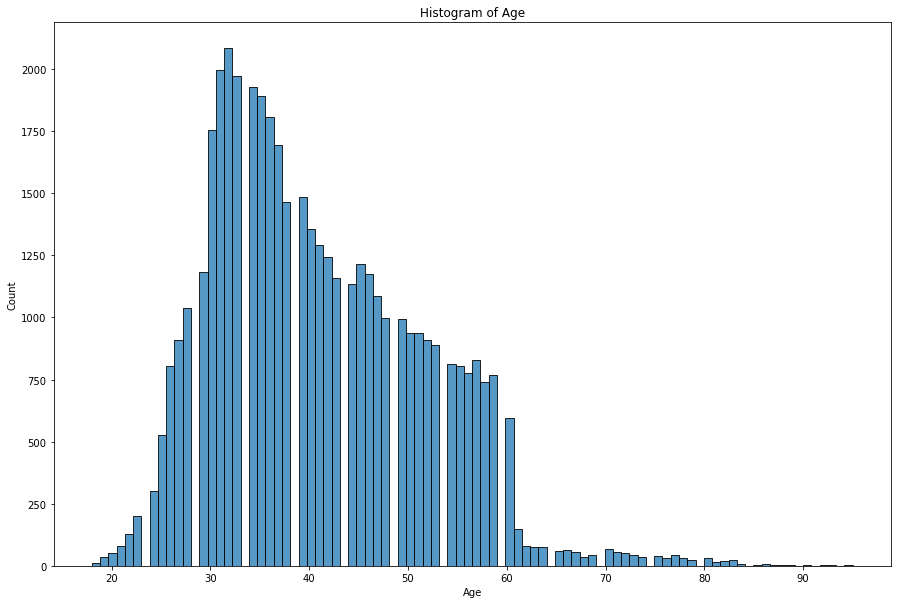

In [4]:
fig,ax = plt.subplots(figsize=(15,10))
sns.histplot(df_bank.age)
ax.set_xlabel('Age')
ax.set_title('Histogram of Age')

### BARPLOT

Text(0.5, 1.0, 'Number of Clients Have Subscribed a Term Deposit in Marital Status Category')

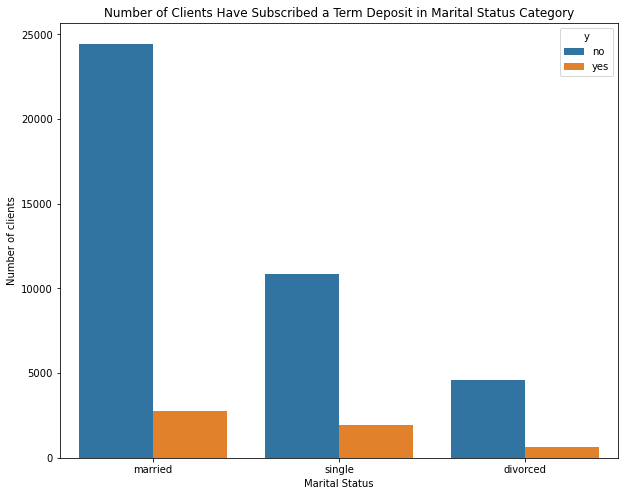

In [5]:
fig,ax = plt.subplots(figsize=(10,8))
sns.countplot(x='marital', hue='y', data=df_bank)
ax.set_xlabel('Marital Status')
ax.set_ylabel('Number of clients')
ax.set_title('Number of Clients Have Subscribed a Term Deposit in Marital Status Category')

## PREPROCESSING

In [6]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# delete kolom contact, day, month, duration
df_bank.drop(columns=['contact','day','month','duration'], inplace=True)

### ENCODING & IMPUTASI

In [8]:
# y
df_bank.y = df_bank.y.map({'no':0,'yes':1})

print('y = has the client subscribed a term deposit? \nno: 0, yes: 1')
display(df_bank.head())

y = has the client subscribed a term deposit? 
no: 0, yes: 1


,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,1,-1,0,unknown,0


In [9]:
# job 
# imputasi data unknown ke data yang paling common
print(df_bank.job.value_counts())
df_bank.loc[df_bank.job == 'unknown','job'] = 'blue-collar'

# encode
print('\nnot working: 0, working: 1')
df_bank.job = df_bank.job.map({'retired':0, 'unemployed':0, 'student':0,
                               'blue-collar':1, 'management':1, 'technician':1, 'admin.':1,
                               'services':1, 'self-employed':1, 'entrepreneur':1, 'housemaid':1})
display(df_bank.head())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

not working: 0, working: 1


,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,58,1,married,tertiary,no,2143,yes,no,1,-1,0,unknown,0
1,44,1,single,secondary,no,29,yes,no,1,-1,0,unknown,0
2,33,1,married,secondary,no,2,yes,yes,1,-1,0,unknown,0
3,47,1,married,unknown,no,1506,yes,no,1,-1,0,unknown,0
4,33,1,single,unknown,no,1,no,no,1,-1,0,unknown,0


In [10]:
# marital
print(df_bank.marital.value_counts())

# encode
print('\nnot married: 0, married: 1')
df_bank.marital = df_bank.marital.map({'single':0, 'divorced':0,
                                       'married':1})
display(df_bank.head())

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

not married: 0, married: 1


,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,58,1,1,tertiary,no,2143,yes,no,1,-1,0,unknown,0
1,44,1,0,secondary,no,29,yes,no,1,-1,0,unknown,0
2,33,1,1,secondary,no,2,yes,yes,1,-1,0,unknown,0
3,47,1,1,unknown,no,1506,yes,no,1,-1,0,unknown,0
4,33,1,0,unknown,no,1,no,no,1,-1,0,unknown,0


In [11]:
df_bank.loc[df_bank.education == 'unknown', 'education']

3        unknown
4        unknown
13       unknown
16       unknown
42       unknown
          ...   
45129    unknown
45141    unknown
45150    unknown
45158    unknown
45186    unknown
Name: education, Length: 1857, dtype: object

In [12]:
# education
# imputasi data unknown ke data yang paling common
print(df_bank.education.value_counts())
df_bank.loc[df_bank.education == 'unknown', 'education'] = 'secondary'

# encode
print('\nprimary: 1, secondary: 2, tertiary: 3')
df_bank.education = df_bank.education.map({'primary':1,
                                           'secondary':2,
                                           'tertiary':3})
display(df_bank.head())

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

primary: 1, secondary: 2, tertiary: 3


,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,58,1,1,3,no,2143,yes,no,1,-1,0,unknown,0
1,44,1,0,2,no,29,yes,no,1,-1,0,unknown,0
2,33,1,1,2,no,2,yes,yes,1,-1,0,unknown,0
3,47,1,1,2,no,1506,yes,no,1,-1,0,unknown,0
4,33,1,0,2,no,1,no,no,1,-1,0,unknown,0


In [13]:
# default
print(df_bank.default.value_counts())

# encode
print('\nno: 0, yes: 1')
df_bank.default = df_bank.default.map({'no':0, 'yes':1})
display(df_bank.head())

no     44396
yes      815
Name: default, dtype: int64

no: 0, yes: 1


,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,58,1,1,3,0,2143,yes,no,1,-1,0,unknown,0
1,44,1,0,2,0,29,yes,no,1,-1,0,unknown,0
2,33,1,1,2,0,2,yes,yes,1,-1,0,unknown,0
3,47,1,1,2,0,1506,yes,no,1,-1,0,unknown,0
4,33,1,0,2,0,1,no,no,1,-1,0,unknown,0


In [14]:
# housing
print(df_bank.housing.value_counts())

# encode
print('\nno: 0, yes: 1')
df_bank.housing = df_bank.housing.map({'no':0, 'yes':1})
display(df_bank.head())

yes    25130
no     20081
Name: housing, dtype: int64

no: 0, yes: 1


,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,58,1,1,3,0,2143,1,no,1,-1,0,unknown,0
1,44,1,0,2,0,29,1,no,1,-1,0,unknown,0
2,33,1,1,2,0,2,1,yes,1,-1,0,unknown,0
3,47,1,1,2,0,1506,1,no,1,-1,0,unknown,0
4,33,1,0,2,0,1,0,no,1,-1,0,unknown,0


In [15]:
# loan
print(df_bank.loan.value_counts())

# encode
print('\nno: 0, yes: 1')
df_bank.loan = df_bank.loan.map({'no':0, 'yes':1})
display(df_bank.head())

no     37967
yes     7244
Name: loan, dtype: int64

no: 0, yes: 1


,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,58,1,1,3,0,2143,1,0,1,-1,0,unknown,0
1,44,1,0,2,0,29,1,0,1,-1,0,unknown,0
2,33,1,1,2,0,2,1,1,1,-1,0,unknown,0
3,47,1,1,2,0,1506,1,0,1,-1,0,unknown,0
4,33,1,0,2,0,1,0,0,1,-1,0,unknown,0


In [16]:
# poutcome
# imputasi data unknown ke data yang paling common
print(df_bank.poutcome.value_counts())
df_bank.loc[df_bank.poutcome == 'unknown', 'poutcome'] = 'failure'

# encode
print('\nfailure: 0, other: 1, success: 2')
df_bank.poutcome = df_bank.poutcome.map({'failure':0,
                                         'other':1,
                                         'success':2})
display(df_bank.head())

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

failure: 0, other: 1, success: 2


,age,job,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,58,1,1,3,0,2143,1,0,1,-1,0,0,0
1,44,1,0,2,0,29,1,0,1,-1,0,0,0
2,33,1,1,2,0,2,1,1,1,-1,0,0,0
3,47,1,1,2,0,1506,1,0,1,-1,0,0,0
4,33,1,0,2,0,1,0,0,1,-1,0,0,0


### MODELLING

In [17]:
# buat variabel train dan test
X = df_bank.drop(columns='y')
y = df_bank.y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [18]:
# scaling
scaler = StandardScaler()
scaler.fit(X_train)

# transformasi
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## LOGISTIC REGRESSION

In [25]:
# prediksi
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [26]:
# evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11937
           1       0.68      0.16      0.25      1627

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



## K-Nearest Neighbors

In [28]:
# prediksi
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [30]:
# evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94     11937
           1       0.51      0.20      0.28      1627

    accuracy                           0.88     13564
   macro avg       0.70      0.58      0.61     13564
weighted avg       0.85      0.88      0.86     13564



## SVM

In [21]:
# prediksi
model = LinearSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11937
           1       0.67      0.17      0.27      1627

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.60     13564
weighted avg       0.87      0.89      0.86     13564



## Decision Tree

In [34]:
# prediksi
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [35]:
# evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     11937
           1       0.26      0.26      0.26      1627

    accuracy                           0.82     13564
   macro avg       0.58      0.58      0.58     13564
weighted avg       0.82      0.82      0.82     13564



## Random Forest

In [37]:
# prediksi
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [39]:
# evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     11937
           1       0.49      0.21      0.29      1627

    accuracy                           0.88     13564
   macro avg       0.69      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



## Naive Bayes

In [41]:
# prediksi
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [42]:
# evaluasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90     11937
           1       0.32      0.36      0.34      1627

    accuracy                           0.83     13564
   macro avg       0.62      0.63      0.62     13564
weighted avg       0.84      0.83      0.84     13564

